# Самостоятельная работа № 1

### Задание 1

Модуль лингвистической предобработки текста является одним из важнейших компонентов современных TTS систем.
Стандартный набор преобразований над текстом включает в себя:
- нормализацию 
- токенизацию 
- построение транскрипции

Нормализация подразумевает расшифровку числовых последовательностей, дат, оббревиатур, иноязычных вставок, сокращений и т.д. (не путать с приведением к нормальной форме слов - принятой терминологиией в NLP).

Токенизация - разбиение текста на предложения и слова.

Построение транскрипции позволяет получить из графемного фонемное представление текста. На этом же этапе разрешается пробелма расстановки ударений. 

Предлагается построить простой пайплайн лингвистической предобработки: токенизация на предложения, нормализация каждого предложения, получение фонемной последовательности для каждого предложения.

### Инструкция по установке и подключению сторонних библиотек из репозиторией (если не устанавливается через pip)
1. Склонировать репозиторий 

*!git clone путь к репозиторию*

2. Добавить корень репо в PATH

*sys.path.append("корень склонированного репо")*

3. Установить необходимые зависимости для репо

*!pip install название библиотеки*

In [1]:
# утрановка необходимых библиотек

!pip install torch

In [2]:
# Импорт необходимых библиотек

import numpy as np
import os
import sys
import uuid
import torch

from google.colab import drive
from google.colab import files
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# ваш номер
my_id = uuid.uuid4().hex
print(my_id)

ea189f21c6a34deea5a7b9b8f67246ca


In [4]:
# Исходный текст
input_text = "В 1785 г в городе Augsburg случилось странное проишествие. Группа в 18 человек, где каждый весил не менее 100 кг, устроила праздник на втором этаже деревянного здания."

In [5]:
try: 
  import razdel
  print('import razdel')
except:
  os.system('pip install razdel')
  print('install razdel')
  import razdel

install razdel


In [6]:
import razdel

In [7]:
# Используйте razdel отсюда https://github.com/natasha/razdel
from razdel import sentenize

def tokenize_by_sent(text):
   "Возвращает список токенизированных предложений"
   return list(sentenize(text))

In [8]:
sentences = tokenize_by_sent(input_text)

In [9]:
print(sentences)

[Substring(0, 58, 'В 1785 г в городе Augsburg случилось странное проишествие.'), Substring(59, 167, 'Группа в 18 человек, где каждый весил не менее 100 кг, устроила праздник на втором этаже деревянного здания.')]


Токенизация на предложения нужна и при подготовке обучающих баз и при инференсе системы. Обучать модель на длинных текстах как правило не целесообразно. 

Токенизация на слова может понадобится для получения границ слов, получения знаков препринания, может требоваться для более качественной нормализации.

In [10]:
!git clone https://github.com/snakers4/russian_stt_text_normalization

Cloning into 'russian_stt_text_normalization'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 23), reused 19 (delta 9), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [11]:
sys.path.append("russian_stt_text_normalization")

In [12]:
# Для реализации функции воспользуйтесь инструментом Normalizer из этого репозитория https://github.com/snakers4/russian_stt_text_normalization
# подсказка по путям sys.path.append("russian_stt_text_normalization")
from normalizer import Normalizer
os.chdir('/content/russian_stt_text_normalization')


def normalize(text):
  "Возвращает нормализованное предложение"
  normalizer = Normalizer()
  return normalizer.norm_text(text)

In [13]:
norm_sentences = [normalize(sentence.text) for sentence in sentences]

100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


In [14]:
print(norm_sentences)

['В тысяча семьсот восемьдесят пятый год в городе огсбург случилось странное проишествие.', 'Группа в восемнадцать человек, где каждый весил не менее ста килограммов, устроила праздник на втором этаже деревянного здания.']


Нормализация текста - сложная задача. Далеко не всегда открытые решения хорошо с ней справляются. Нормализация на основе лингвистических баз и правил может справляться с задачей лучше, чем нейросетевая модель.

In [15]:
!git clone https://github.com/nsu-ai/russian_g2p

Cloning into 'russian_g2p'...
remote: Enumerating objects: 878, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 878 (delta 6), reused 9 (delta 4), pack-reused 854
Receiving objects: 100% (878/878), 33.92 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (586/586), done.


In [16]:
!pip install rnnmorph

     |████████████████████████████████| 10.5MB 11.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 8.2MB 37.5MB/s 
  Created wheel for rnnmorph: filename=rnnmorph-0.4.0-cp37-none-any.whl size=10521037 sha256=3e5829556a4730bc921b585bc72a30b7585ed1632e5052c586c3e0c91a744e1b
  Stored in directory: /root/.cache/pip/wheels/61/74/5d/3c6c523a759b67e6a81677e2aad003321536587d1575a4face
  Created wheel for russian-tagsets: filename=russian_tagsets-0.6-cp37-none-any.whl size=24635 sha256=4a02bcbcac388b3267b52f934980e8a906383ed9691bb4a524a6ed7ff7fc50c5
  Stored in directory: /root/.cache/pip/wheels/e8/9d/dd/4679aca4031fdb0d3ad65e165ba5343e61441ed7ad587a08e6
Successfully built rnnmorph russian-tagsets


In [17]:
!pip install dawg

     |████████████████████████████████| 378kB 12.8MB/s 
  Created wheel for dawg: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=859820 sha256=1d96940ee3ea1280955a88dd6df1de9ab651df9e5197982d73497f967dd7c1e9
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built dawg


In [18]:
os.rename("russian_g2p", "root_russian_g2p")
os.replace("root_russian_g2p/russian_g2p", "russian_g2p")
sys.path.append("root_russian_g2p/russian_g2p")

In [19]:
from russian_g2p.Transcription import Grapheme2Phoneme

In [20]:
# Для реализации используйте Accentor отсюда https://github.com/nsu-ai/russian_g2p
# Для решения проблем с импортом в этой библиотеке лучше перенести папку russian_g2p ближе к корню
# os.rename("russian_g2p", "root_russian_g2p")
# os.replace("root_russian_g2p/russian_g2p", "russian_g2p")


def g2p(text):
  "Возвращает список из фонем входящего текста"
  transcription = Grapheme2Phoneme()
  return transcription.phrase_to_phonemes(text)

In [21]:
phonemes_sequences = [g2p(sentence) for sentence in norm_sentences]

/content/russian_stt_text_normalization/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `проишествие`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_stt_text_normalization/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `странное`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_stt_text_normalization/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `случилось`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_stt_text_normalization/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `огсбург`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_stt_text_normalization/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `вгороде`: the accent for this word is unknown!
  warnings.w

In [22]:
print(phonemes_sequences)

[['F', 'T', 'Y', 'S0', 'I', 'TSH0', 'A', 'S0', 'I', 'M0', 'S', 'A', 'T', 'V', 'A', 'S0', 'I', 'M0', 'D0', 'I', 'S0', 'I', 'T', 'P0', 'I', 'T', 'Y', 'J0', 'G', 'A', 'T', 'V', 'G', 'A', 'R', 'A', 'D0', 'I', 'A', 'G', 'Z', 'B', 'U', 'R', 'K', 'S', 'L', 'U', 'TSH0', 'I', 'L', 'A', 'S0', 'S', 'T', 'R', 'A', 'N', 'A', 'J0', 'I', 'P', 'R', 'A', 'I', 'SH', 'Y', 'S', 'T', 'V0', 'I', 'J0', 'I'], ['G', 'R', 'U', 'P', 'A', 'V', 'A', 'S0', 'I', 'M', 'N', 'A', 'TS', 'A', 'T0', 'TSH0', 'I', 'L', 'A', 'V0', 'I', 'G', 'D0', 'I', 'K', 'A', 'ZH', 'D', 'Y', 'J0', 'V0', 'I', 'S0', 'I', 'L', 'N0', 'I', 'M0', 'I', 'N0', 'I', 'J0', 'I', 'S', 'T', 'A', 'K0', 'I', 'L', 'A', 'G', 'R', 'A', 'M', 'A', 'F', 'U', 'S', 'T', 'R', 'A', 'I', 'L', 'A', 'P', 'R', 'A', 'Z0', 'N0', 'I', 'K', 'N', 'A', 'F', 'T', 'A', 'R', 'A', 'M', 'Y', 'T', 'A', 'ZH', 'Y', 'D0', 'I', 'R0', 'I', 'V0', 'I', 'N', 'A', 'V', 'A', 'Z', 'D', 'A', 'N0', 'I', 'J0', 'A']]


In [23]:
# Сохраняем результат себе

with open(f"result_1_{my_id}.txt", 'w') as f_out:
  for sequence in phonemes_sequences:
    f_out.write(f'{" ".join(sequence)}\n')

In [24]:
files.download(f"result_1_{my_id}.txt") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Насколько можно видеть, итоговая последовательность может представлять из себя простой список из фонем, к котором не видно границ слов или знаков препинания.
В самом просто варианте, границы слов можно обозначить пробельным символом. Однако знаки препинания лучше исключить из финальной последовательности, т.к. их наличие будет мешать модели выстраивать матрицу внимания (какой длительности будет многоточие или знак вопроса?). 

### Задание 2

Пайплайн получения признаков из аудио для TTS может быть достаточно сложным.
Последовательность обработчиков и их параметры будут зависеть в том числе и от особенностей вокодера. 
Наиболее распространенным вариантом акустических признаков является логарифмированная мел-спектрограмма.

Задание - реализовать функции построения мел-спектрограммы с заданными параметрами.

Общий вид пайплайна такой: Входной сигнал -> Pre-emphasis -> STFT -> Магнитуда-> Мел-скейл -> Логарифмирование

In [25]:
# примонтировать свой диск (куда заранее положили нужный wav файл)
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
# загрузки входного сигнала (скорее всего путь будет таким 'gdrive/MyDrive/audio_sample/example.wav') 
# можно воспользоваться librosa
import librosa
def read_wave(wave_path):
  "возвращает волну и sample rate"
  return librosa.load(wave_path)

wave_path = '/content/example.wav'
wave, sr = read_wave(wave_path)

In [27]:
print(f"Sample rate = {sr}")
print(f"Wave max = {np.max(wave)} Wave min {np.min(wave)}")

Sample rate = 22050
Wave max = 0.4473876953125 Wave min -0.579498291015625


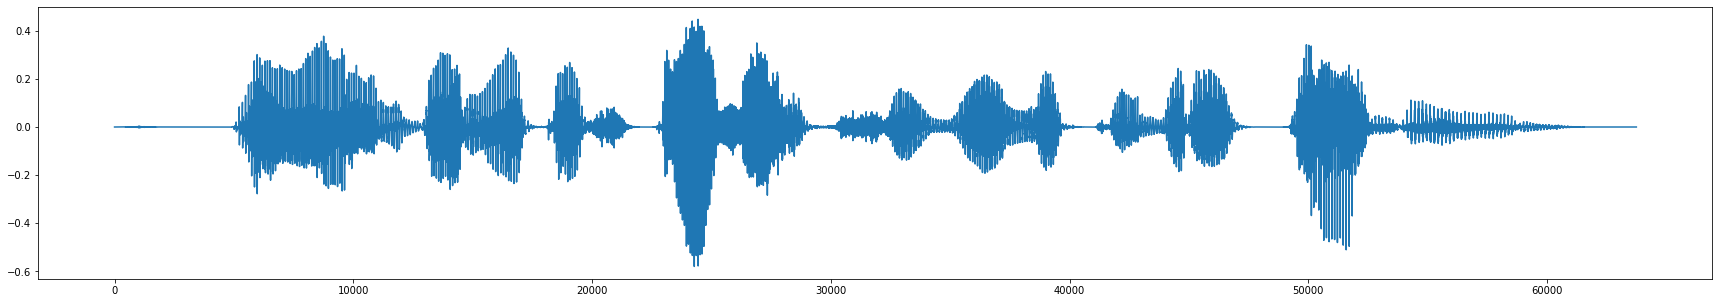

In [28]:
plt.figure(figsize=(30, 5))
plt.plot(wave)

Данные могут быть в формате float32 или int16 (обычно ...). Нужно привести к формату float32 в диапазоне значений [0, 1]. Стоит обратить внимание на максимальное и минимальное значение (если значения близки к максимум и минимуму диапазона, возможно они были нормализованы или даже клипированы). 

In [29]:
# Pre-emphasis
# y_t = x_t − α * x_t − 1
# α = 0.97

def preemphasis(x, coef=0.85):
    return x - coef * x - 1

preemh_wave = preemphasis(
    (np.max(wave) - wave) / (np.max(wave) - np.min(wave)),
                          0.97)

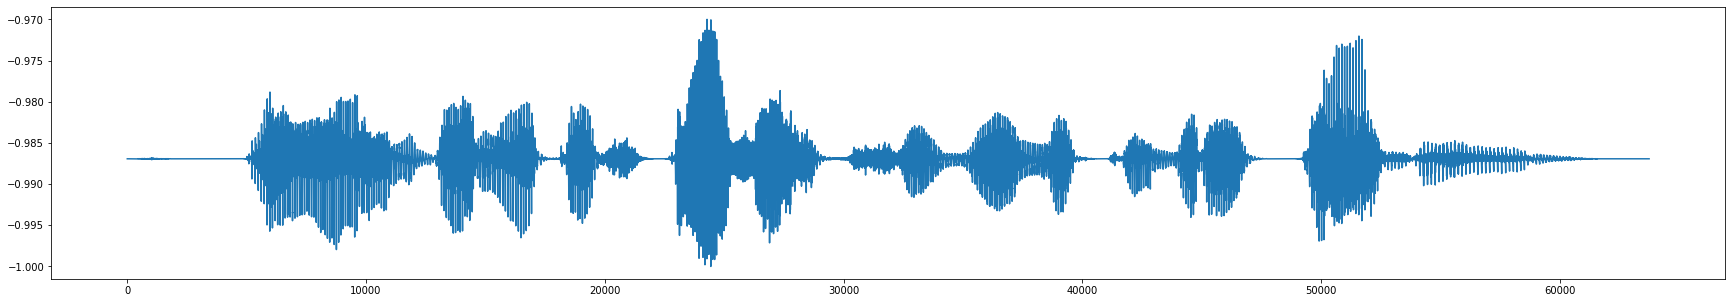

In [30]:
plt.figure(figsize=(30, 5))
plt.plot(preemh_wave )

Обратимое преобразование. Усиливает высокие частоты, ослабляет низкие. 

В вокодерах необходим для уменьшения высокочастотного шума при мю-кодировании.


In [31]:
# STFT (можно воспользоваться librosa)
# window = 1024, hop = 256, паддинг reflect, центрировать не надо, окно Ханна


def get_stft(data, n_fft, hop, window):
  return librosa.stft(data, n_fft=n_fft, hop_length=hop, center=False, window=window)

stft_features = get_stft(preemh_wave, 1024, 256, 'hann')

Short-time Fourier transform. Комплексные значения признаков. 

Окно анализа обычно соразмерно средней длине фонемы, шаг близким к средней длине коротких фонем (эвристические соображения от которых стоит отталкиваться).

In [32]:
# Магнитуда
# получить амплитудный спектр

def get_magnitude(features):
  magnitude, _ = librosa.magphase(features)
  return magnitude

magnitude_features = get_magnitude(stft_features)

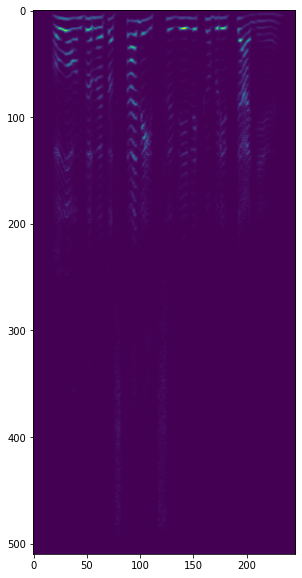

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(magnitude_features[3:])

Теряется информация о фазе (фазовые признаки значительно менее структурированы). Признаки все еще довольно большого размера. В некоторых моделях TTS применяются и такие.

In [34]:
# Мел-скейл. Реализуется в матричном виде как X_mel = Mel_basis * X, где Mel_basis 
# 100 бинов без ограничений частот (можно воспользоваться librosa.filters)

def get_mel_features(magnitude_features, mel_basis):
  return mel_basis @ magnitude_features 

def get_mel_basis(sample_rate, size):
  return librosa.filters.mel(sr=sample_rate, n_fft=1024, n_mels=size)

mel_basis = get_mel_basis(sr, 100)
mel_features = get_mel_features(magnitude_features, mel_basis)

In [35]:
print(f"max {mel_features.max()} min {mel_features.min()} mean {mel_features.mean()}")

max 5.0127482414245605 min 1.7952383552299615e-17 mean 0.050877735018730164


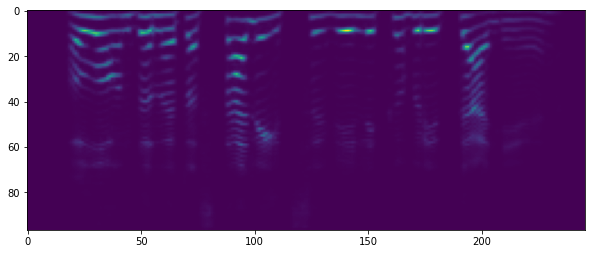

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(mel_features[3:])

Значительно уменьшается размер признаков, при этом практически не теряется воспринимаемое акустическое качество.

In [37]:
# Логарифмирование
# амплитуды лучше логарифмировать ln(x), 1e-5 установить минимальным значением под логарифмом (для вычислительной стабильности)
# 20log10(x) был бы перевод в децибелы, но разница в константе, поэтому можно не усложнять

def get_log_features(features):
  return np.log(features + 10e-5)

log_mel_features = get_log_features(mel_features)

In [38]:
print(f"max {log_mel_features.max()} min {log_mel_features.min()} mean {log_mel_features.mean()}")

max 1.612004280090332 min -9.21034049987793 mean -8.03152847290039


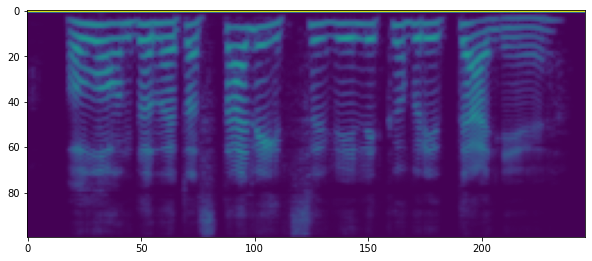

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(log_mel_features)

Такие признаки уже можно нормализовать.

Совет - посмотрите, как будет выглядеть эти же признаки без pre-emphasis.

In [40]:
# Выгрузим результат
np.save(f"log_mel_features_{my_id}.npy", log_mel_features)
files.download(f"log_mel_features_{my_id}.npy") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Задание 3

Механизм внимания позволяет модели отображать последовательность фонем на спектрограмму. Базовый вариант, предложенный в модели Tacotron 1, называется content based attention.

Этот простой механизм пришел в TTS из области машинного перевода и он не учитывает многих особенностей синтеза речи. В главном это монотонный и локальный характер внимания. 

Монотонность обеспечивается тем, что порядок звуков и фонем одинаковый (если одна фонема находится в порядке после другой, то и ее признаки в спектрограмме будут находится после признаков первой, в отличие от задачи машинного перевода, где порядок слов в разных языках может отличаться). 

Локальность обеспечивается тем, что фонемы влияют на звучание только своих ближайших соседей.

Не очень подходящий механзм внимания значительно влияет на качество и естественность речи. Непрерывные длинные участки речи с ним вообще крайне затруднительно синтезировать (внимание "ломается", "рассыпается", пропадают звуки, слова, речь заедает, звучит "белиберда", ломается голос, интонации).

Разработано уже много вариантов улучшения механизма внимания. А одни из лучших способов - сразу прогнозировать длительность фонем.

Попробуем на игрушечном примере построить один из рабочих вариантов механизма внимания FORWARD ATTENTION (https://arxiv.org/pdf/1807.06736.pdf). 

In [41]:
import torch
import numpy as np

In [42]:
seq_len = 100
enc_size = 32
attn_rnn_size = 16
dec_rnn_size = 16
attn_inner_size = 32
decoder_steps = 200 # у нас нет остановки, поэтому зададим заранее количество шагов декодера

In [43]:
# загрузим заранее сгенерированный вектор
encoder_output = torch.from_numpy(np.load("/content/encoder_output.npy"))

In [44]:
class Attention(torch.nn.Module):
  def __init__(self, query_size, key_size, attn_inner_size):
    super(Attention, self).__init__()
    self.softmax = torch.nn.Softmax(dim=0)
    self.query = torch.nn.Linear(query_size, attn_inner_size, bias=False)
    self.key = torch.nn.Linear(key_size, attn_inner_size, bias=False)
    self.v = torch.nn.Linear(attn_inner_size, 1, bias=False)

  def forward(self, queries, keys):
    keys = self.key(keys)
    queries = self.query(queries)
    attn = self.v(torch.tanh((queries + keys)).squeeze())
    attn = self.softmax(attn)
    return attn


class SimpleAttnDecoder(torch.nn.Module):
  def __init__(self, enc_size, attn_rnn_size, dec_rnn_size, attn_inner_size):
    super(SimpleAttnDecoder, self).__init__()
    self.attn_rnn_size = attn_rnn_size
    self.dec_rnn_size = dec_rnn_size
    self.enc_size = enc_size
    self.attention = Attention(attn_rnn_size, enc_size, attn_inner_size)
    self.rnn_attn = torch.nn.RNNCell(input_size=enc_size, hidden_size=attn_rnn_size)
    self.rnn_decoder = torch.nn.RNNCell(input_size=enc_size, hidden_size=dec_rnn_size)

  def forward(self, encoder_output, output_len):
    attention_matrix = []
    outputs = []
    attention_state = torch.zeros(1, self.attn_rnn_size).float()
    decoder_state = torch.zeros(1, self.dec_rnn_size).float()
    context = torch.zeros(1, self.enc_size).float()
    alpha = torch.zeros(len(encoder_output), 1)
    alpha[0][0] = 1
    
    for idx in range(output_len):
      attention_state = self.rnn_attn(context, attention_state)
      attention_probs = self.attention(attention_state , encoder_output)
      alpha_n_1 = torch.cat((torch.tensor([[0.]]), alpha), 0)
      alpha = torch.sum(torch.cat((alpha_n_1[:-1, :], alpha), 1), 1).unsqueeze(1) * attention_probs
      attention_probs = alpha / torch.sum(alpha)
      alpha = attention_probs
      
      context = torch.mm(encoder_output.squeeze().transpose(0,1), attention_probs).transpose(0,1)
      decoder_state = self.rnn_decoder(context, decoder_state)
      
      attention_matrix.append(attention_probs)
      outputs.append(decoder_state)
    
    attention_matrix = torch.stack(attention_matrix).transpose(0,1).squeeze()
    outputs = torch.stack(outputs).transpose(0,1).squeeze()
    return outputs, attention_matrix

In [45]:
decoder = SimpleAttnDecoder(enc_size, attn_rnn_size, dec_rnn_size, attn_inner_size)
decoder.load_state_dict(torch.load("/content/decoder_state_dict.pt"))

<All keys matched successfully>

In [46]:
with torch.no_grad():
  outputs, attention_matrix = decoder(encoder_output, decoder_steps)

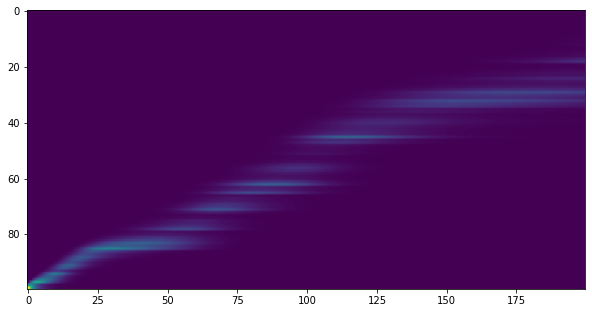

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(attention_matrix.flip(0))

In [48]:
# Выгрузим готовый результат (матрицу внимания с реализованным forward attention)
np.save(f"attention_{my_id}.npy", attention_matrix.flip(0).numpy())
files.download(f"attention_{my_id}.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Матрица внимания будет значительно диагональнее (и это модель со случайным входом и случайными весами!)